In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

tf.__version__

'2.16.1'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration of ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    # Rescale pixel values to the range [0, 1]
    rescale = 1./255,
    # Randomly apply shearing transformation
    shear_range = 0.2,
    # Randomly apply zooming transformation
    zoom_range = 0.2,
    # Randomly apply horizontal flipping
    horizontal_flip = True
)

# Generating batches of training data
# flow_from_directory method loads images from the specified directory structure
# and generates augmented batches of training data on-the-fly during model training
# For Training Data
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',      # Directory containing training images
    target_size = (64, 64),      # Resize all images to 64x64 pixels
    batch_size = 32,             # Number of images in each batch (can be adjusted)
    class_mode = 'binary'        # Type of labels (binary for binary classification)
)

# For Testing Data
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [3]:
input_shape = (64, 64, 3)

# Initialize the CNN
cnn = tf.keras.models.Sequential([
    # Input layer specifying the input shape
    tf.keras.layers.Input(shape=input_shape),
    # Step-1 Convolutional
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    # Step-2 Pooling
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    # Step-3 (Add 2nd CNN layer)
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    # Step-4 Flattening
    tf.keras.layers.Flatten(),
    # Step-5 Full Connection
    tf.keras.layers.Dense(units=128, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [4]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


d:\CODING\_Deep Learning\Deep-Learning-AI-\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.5654 - loss: 0.6828 - val_accuracy: 0.6690 - val_loss: 0.6023
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.6688 - loss: 0.6122 - val_accuracy: 0.6690 - val_loss: 0.5972
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.6890 - loss: 0.5893 - val_accuracy: 0.7085 - val_loss: 0.5691
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.6965 - loss: 0.5801 - val_accuracy: 0.7240 - val_loss: 0.5565
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.7400 - loss: 0.5289 - val_accuracy: 0.7510 - val_loss: 0.5109
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.7438 - loss: 0.5120 - val_accuracy: 0.7605 - val_loss: 0.5058
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.7552 - loss: 0.4999 - val_accuracy: 0.7620 - val_loss: 0.5007
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.7753 - loss: 0.4809 - val_accurac

In [12]:
import os; directory = 'dataset/single_prediction'

# Get a list of all files in the directory and sorts the files
files = os.listdir(directory); files.sort()

# Rename each file sequentially
for i, filename in enumerate(files, 1):
    # Construct the new filename with the sequential number
    new_filename = f"{i}.jpg"
    # Construct the full path for the old and new filenames
    old_filepath = os.path.join(directory, filename); new_filepath = os.path.join(directory, new_filename)
    # Rename the file
    os.rename(old_filepath, new_filepath)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


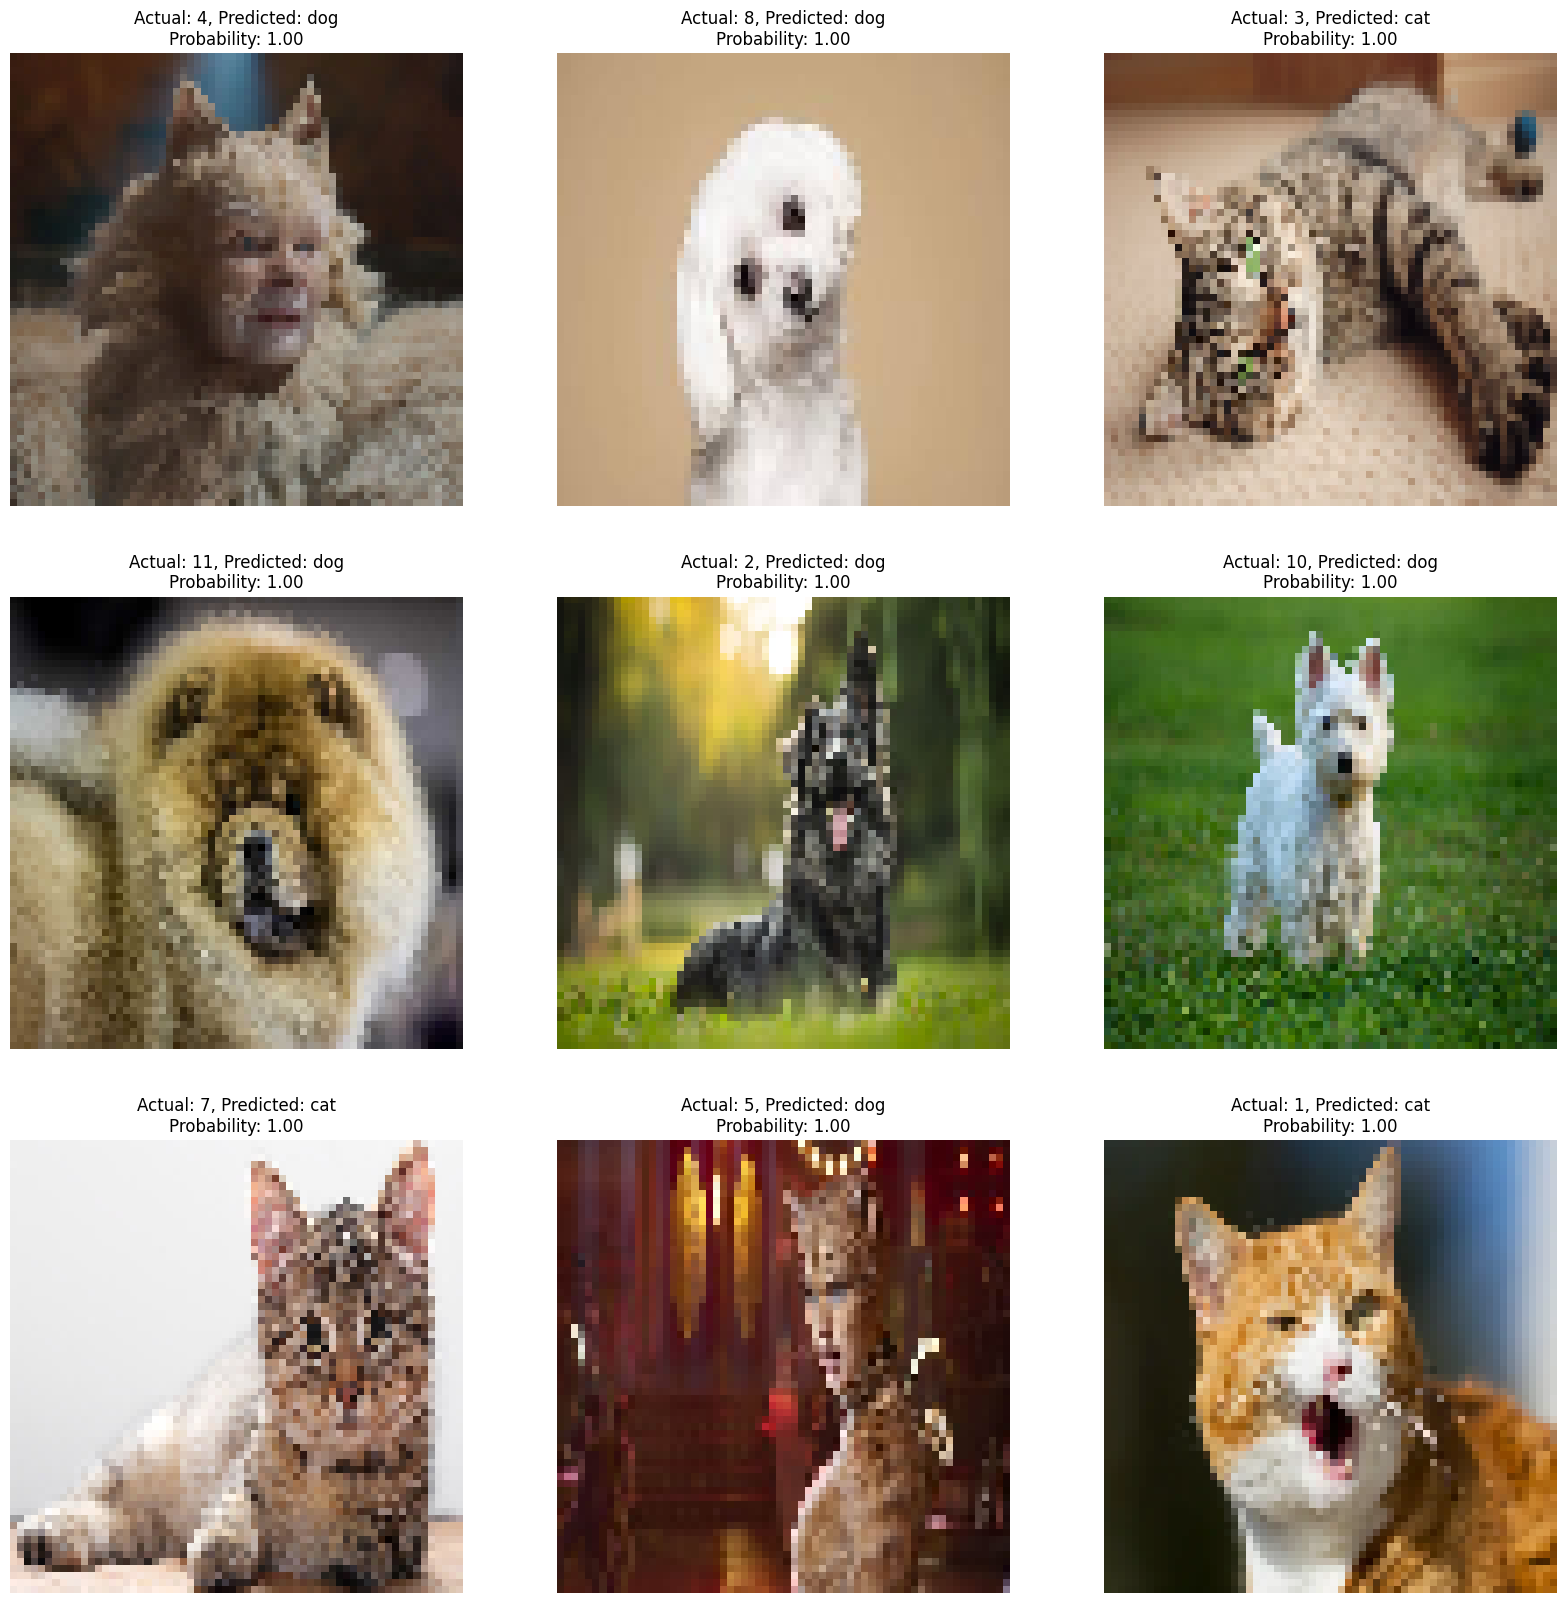

In [21]:
import os
import random
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Load 10 random images from the dataset
image_dir = 'dataset/single_prediction'
image_files = random.sample(os.listdir(image_dir), 9)

# Display each image along with its actual label, predicted label, and probability
plt.figure(figsize=(20, 20))
for i, image_file in enumerate(image_files, 1):
    # Load and preprocess the image
    img_path = os.path.join(image_dir, image_file)
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make prediction
    result = cnn.predict(img_array)
    predicted_class = 'dog' if result[0][0] == 1 else 'cat'
    probability = result[0][0] if predicted_class == 'dog' else 1 - result[0][0]
    
    # Display the image with labels and probability
    plt.subplot(3, 3, i)
    plt.imshow(img)
    plt.title(f"Actual: {image_file.split('.')[0]}, Predicted: {predicted_class}\nProbability: {probability:.2f}")
    plt.axis('off')

plt.show()

In [22]:
model_path = 'saved_model/cnn_model.h5'
cnn.save(model_path)
print("Model saved successfully at:", model_path)

Model saved successfully at: saved_model/cnn_model.h5
